<a href="https://colab.research.google.com/github/willy-arison/Machine-learning/blob/master/animal_90_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
iamsouravbanerjee_animal_image_dataset_90_different_animals_path = kagglehub.dataset_download('iamsouravbanerjee/animal-image-dataset-90-different-animals')

print('Data source import complete.')


In [ ]:
!pip install -q kaggle

import json
import os

kaggle_creds = {"username":"tafita","key":"28cf7f6f10c01946301140af5a6eb797"}

os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_creds, f)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals
!unzip animal-image-dataset-90-different-animals.zip -d animals_90

!ls animals_90

In [ ]:
import os
from pathlib import Path

image_path = Path('/kaggle/working/animals_90/animals/animals')

for dirpath, dirname, filename in os.walk(image_path):
    print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")

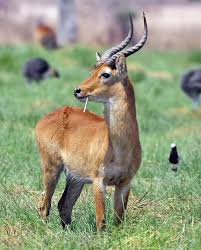

In [ ]:
from PIL import Image

img = Image.open('/kaggle/working/animals_90/animals/animals/antelope/0c16ef86c0.jpg')
img

Random image path: /kaggle/working/animals_90/animals/animals/swan/06e50955d5.jpg
Image class: swan
Image height: 185
Image width: 272


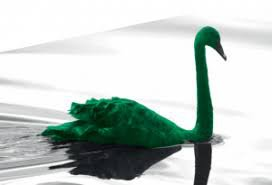

In [ ]:
import random

# get the list of all image path
image_path_list = list(image_path.glob('*/*.jpg'))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

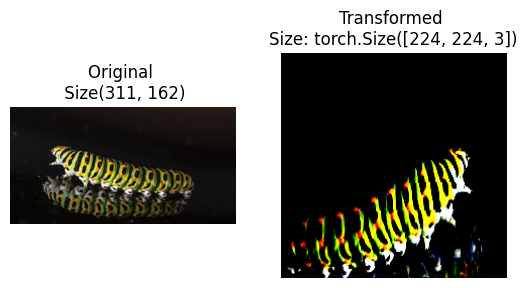

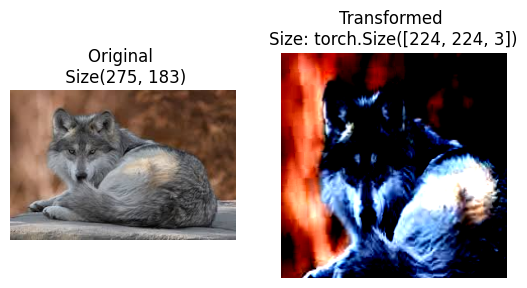

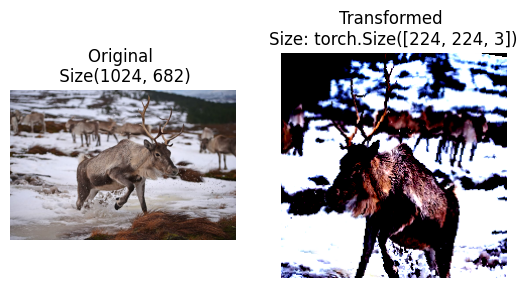

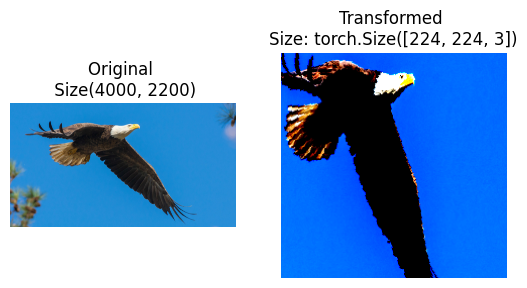

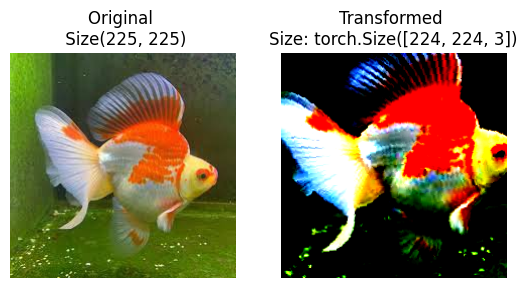

In [ ]:
import matplotlib.pyplot as plt

train_transform = transforms.Compose([
    transforms.Resize(size=(300, 300)),
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

n = 5
random_paths = random.sample(image_path_list, k=n)

for img in random_paths:
    with Image.open(img) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f'Original \n Size{f.size}')
        ax[0].axis('off')

        # matplotlib img [H, W, C]
        # Transform img [C, H, W]
        img_tranform = train_transform(f).permute(1, 2, 0)

        ax[1].imshow(img_tranform)
        ax[1].set_title(f'Transformed \nSize: {img_tranform.shape}')
        ax[1].axis('off')


In [ ]:
# Load data
data = datasets.ImageFolder(
    root=image_path, # dir path
    transform=train_transform, # transforms to perform on images
    target_transform=None   # transforms to perform on target
)

print(f'Data: \n{data}')

Data: 
Dataset ImageFolder
    Number of datapoints: 5400
    Root location: /kaggle/working/animals_90/animals/animals
    StandardTransform
Transform: Compose(
               Resize(size=(300, 300), interpolation=bilinear, max_size=None, antialias=True)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(224, 224), padding=None)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
# get class name as list
class_names = data.classes
print(f'classes name: {class_names} \nNumeber: {len(class_names)}')

classes name: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra'] 
Numeber: 90


In [ ]:
from torch.utils.data import random_split

# Define split sizes
train_size = int(0.9 * len(data))
val_size = len(data) - train_size

# Randomly split
train_data, val_data = random_split(data, [train_size, val_size])
val_data.dataset.transform = test_transform

In [ ]:
# create dataloader
train_loader = DataLoader(
    train_data,
    batch_size=64,
    shuffle=True
)

val_loader = DataLoader(
    val_data,
    batch_size=64,
    shuffle=False
)

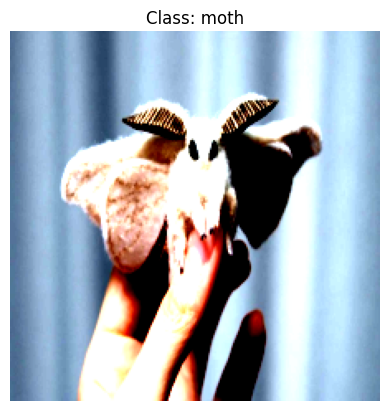

In [ ]:
# Show one image
img, label = next(iter(val_loader))
# original img [C, H, W]
# plt img [H, W, C]
idx_to_class = {
    idx: cls for cls, idx in data.class_to_idx.items()
}

plt.imshow(img[0].permute(1, 2, 0))
plt.title(f'Class: {idx_to_class[label[0].item()]}')
plt.axis('off')
plt.show()

In [ ]:
%%capture
! pip install pytorch-lightning

In [ ]:
import pytorch_lightning as pl
from torchmetrics import Accuracy


def create_trainer(activation, max_epochs=5):
    import logging
    logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)

    return pl.Trainer(
        accelerator="gpu",
        strategy="auto",
        precision="16-mixed",
        devices=-1,
        max_epochs=max_epochs,
        logger=pl.loggers.TensorBoardLogger(f'logs/', name=activation),
        callbacks=[
            pl.callbacks.ModelCheckpoint(
                monitor="val_acc",                  # Metric to monitor
                mode="max",                         # Save when max accuracy
                save_top_k=1,                       # Save only the best model
                filename="{epoch}-{val_acc:.4f}",   # Include accuracy in filename
                save_last=True,                     # save final epoch
                verbose=True                        # Print when new best model is saved
            )
        ],
    )

class Classifier(pl.LightningModule):
    def __init__(self, model, num_classes):
        super().__init__()
        self.model = model
        self.cross_entropy_loss = nn.CrossEntropyLoss()
        self.test_accuracy = Accuracy(task="multiclass", num_classes=num_classes)

    def forward(self, x):
        return self.model(x)  # REQUIRED

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = self.cross_entropy_loss(logits, y)
        self.log('train_loss', loss, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.model(x)
        loss = self.cross_entropy_loss(logits, y)
        acc = (logits.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)
        return {'val_loss': loss, 'val_acc': acc}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters()) # lr=0.005
        return optimizer


    # Add this method for testing
    def test_step(self, batch, batch_idx):
        x, y = batch
        preds = self(x)  # Forward pass
        self.test_accuracy(preds, y)  # Update accuracy metric
        return preds

    # Optional but recommended: Log final accuracy
    def on_test_epoch_end(self):
        self.log("test_acc", self.test_accuracy.compute(), prog_bar=True)

In [ ]:
classes = len(class_names)
epochs = 50

**Train with ResNet34**

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet34, ResNet34_Weights

name = 'pre-trained'
model = resnet34(weights=ResNet34_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, classes)
trainer = create_trainer(activation=name, max_epochs=epochs)
print(f'Train with {name}')
classifier = Classifier(model, num_classes=classes)
trainer.fit(classifier, train_loader, val_loader)

Train with pre-trained


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

**Test accuracy**

In [ ]:
import glob

print('Results using ResNet34:')
file_path = glob.glob(f'/kaggle/working/logs/pre-trained/version_1/checkpoints/epoch*.ckpt')[0]
model = resnet34(weights=ResNet34_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, classes)
classifier = Classifier.load_from_checkpoint(file_path, model=model, num_classes=classes)
trainer.test(classifier, val_loader)

Results using ResNet34:


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7759259343147278     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.7759259343147278}]

**Train with ResNet50**

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

name = 'pre-trained'
model = resnet50(weights=ResNet50_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, classes)
trainer = create_trainer(activation=name, max_epochs=epochs)
print(f'Train with {name}')
classifier = Classifier(model, num_classes=classes)
trainer.fit(classifier, train_loader, val_loader)

Train with pre-trained


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

**Test accuracy**

In [ ]:
print('Results using ResNet50 pre-trained:')
file_path = glob.glob(f'/kaggle/working/logs/pre-trained/version_2/checkpoints/epoch*.ckpt')[0]
model = resnet50(weights=ResNet50_Weights.DEFAULT)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, classes)
classifier = Classifier.load_from_checkpoint(file_path, model=model, num_classes=classes)
trainer.test(classifier, val_loader)

Results using ResNet50 pre-trained:


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8462963104248047     │
└───────────────────────────┴───────────────────────────┘

[{'test_acc': 0.8462963104248047}]